# No Glue Code

In [1]:
using Pkg
Pkg.activate("..")

  Activating project at `~/Cambdrige`


In [2]:
using Random
using LinearAlgebra
using PyPlot

#What we are tweaking
using Revise
using Turing
using MCMCChains

[ Info: Precompiling Turing [fce5fe82-541a-59a6-adf8-730c64b5f9a0]
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **



## Model

In [3]:
# Just a simple Neal Funnel
d = 21
@model function funnel()
    θ ~ Normal(0, 3)
    z ~ MvNormal(zeros(d-1), exp(θ)*I)
    x ~ MvNormal(z, I)
end

funnel (generic function with 2 methods)

In [4]:
Random.seed!(1)
(;x) = rand(funnel() | (θ=0,))
funnel_model = funnel() | (;x)

DynamicPPL.Model{typeof(funnel), (), (), (), Tuple{}, Tuple{}, DynamicPPL.ConditionContext{NamedTuple{(:x,), Tuple{Vector{Float64}}}, DynamicPPL.DefaultContext}}(funnel, NamedTuple(), NamedTuple(), ConditionContext((x = [1.2142074831535152, 1.23371919965455, -0.8480146960461767, 0.1600994648479841, 1.9180385508479283, -3.401523464506408, -0.0957684186471088, 0.6734622629464286, -3.2749467689509633, -1.6760091758453226, 1.9567202902549736, 0.1136169088905351, 0.11117896909388916, -0.5373922347882832, -0.12436857036298687, -1.2901071061088532, 1.702584517514787, -0.44460133117954226, 1.0818722439221686, 1.2208011493237483],), DynamicPPL.DefaultContext()))

## Sampling

In [5]:
nadapts=500 
TAP=0.95
nuts = Turing.NUTS(nadapts, TAP)

NUTS{Turing.Essential.ForwardDiffAD{0}, (), AdvancedHMC.DiagEuclideanMetric}(500, 0.95, 10, 1000.0, 0.0)

In [6]:
nuts_samples = sample(funnel_model, nuts, 5000)

┌ Info: Found initial step size
└   ϵ = 0.8
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01


Chains MCMC chain (5000×33×1 Array{Float64, 3}):

Iterations        = 501:1:5500
Number of chains  = 1
Samples per chain = 5000
Wall duration     = 8.31 seconds
Compute duration  = 8.31 seconds
parameters        = θ, z[1], z[2], z[3], z[4], z[5], z[6], z[7], z[8], z[9], z[10], z[11], z[12], z[13], z[14], z[15], z[16], z[17], z[18], z[19], z[20]
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse     ess_bulk    ess_tail      rhat  ⋯
      Symbol   Float64   Float64   Float64      Float64     Float64   Float64  ⋯

           θ   -0.0223    0.7886    0.0522     413.6563    169.7823    1.0060  ⋯
        z[1]    0.6063    0.7498    0.0108    5069.7387   3427.1499    1.0025  ⋯
        z[2]    0.6079    0.7573    0.0115    4320.9620   3052.8164    1.0003  ⋯
        z[3]   -0.4327 

In [9]:
theta_nuts = Vector(nuts_samples["θ"][:, 1])
x10_nuts =Vector(nuts_samples["z[10]"][:, 1]);

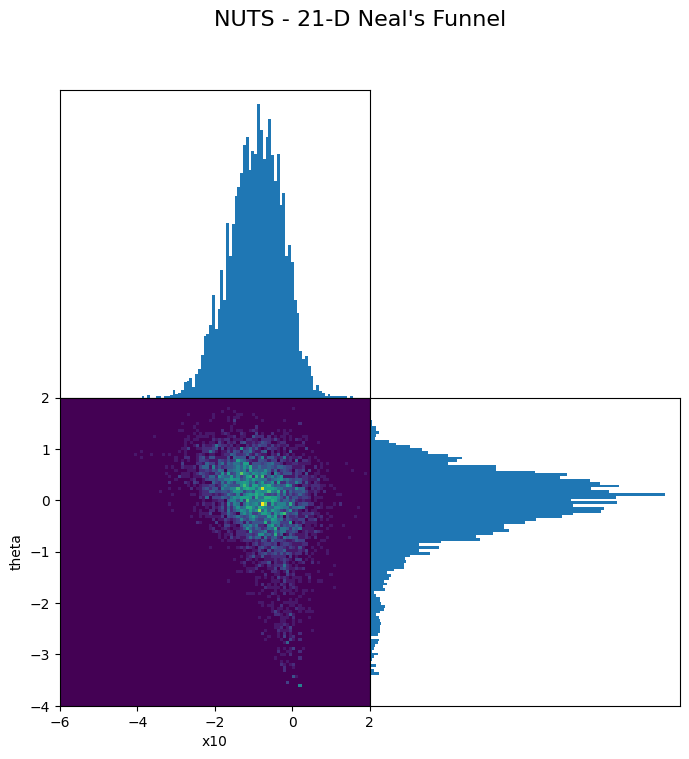

In [10]:
fig, axis = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle("NUTS - 21-D Neal's Funnel", fontsize=16)

fig.delaxes(axis[1,2])
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

axis[1,1].hist(x10_nuts, bins=100, range=[-6,2])
axis[1,1].set_yticks([])

axis[2,2].hist(theta_nuts, bins=100, orientation="horizontal", range=[-4, 2])
axis[2,2].set_xticks([])
axis[2,2].set_yticks([])

axis[2,1].hist2d(x10_nuts, theta_nuts, bins=100, range=[[-6,2],[-4, 2]])
axis[2,1].set_xlabel("x10")
axis[2,1].set_ylabel("theta");